In [2]:
import pandas as pd

df = pd.read_csv("tests/testdata/az_net_flows.csv", index_col=0)
df.head()
df.columns

Index(['TenantId', 'TimeGenerated', 'FlowStartTime', 'FlowEndTime',
       'FlowIntervalEndTime', 'FlowType', 'ResourceGroup', 'VMName',
       'VMIPAddress', 'PublicIPs', 'SrcIP', 'DestIP', 'L4Protocol',
       'L7Protocol', 'DestPort', 'FlowDirection', 'AllowedOutFlows',
       'AllowedInFlows', 'DeniedInFlows', 'DeniedOutFlows', 'RemoteRegion',
       'VMRegion', 'AllExtIPs', 'TotalAllowedFlows'],
      dtype='object')

In [2]:
def one_or_list(series):

    unique_vals = series.unique()
    if len(unique_vals) == 1:
        return unique_vals[0]

def _pd_unique_list(series: pd.Series):
    unique_vals = series.unique()
    if len(unique_vals) == 1:
        return unique_vals[0]
    return list(unique_vals)

agg_dict = {
    "ResourceGroup": _pd_unique_list,
    "VMRegion": _pd_unique_list,
    "FlowDirection": _pd_unique_list,
    "TenantId": _pd_unique_list,
    "node_role": "first",
    "node_type": "first",
}
df.assign(node_role="source", node_type="Column").groupby("AllExtIPs").agg(agg_dict).head().to_dict(orient="index")

{'10.0.3.4': {'ResourceGroup': nan,
  'VMRegion': 'eastus',
  'FlowDirection': ['I', 'O'],
  'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
  'node_role': 'source',
  'node_type': 'Column'},
 '10.0.3.5': {'ResourceGroup': nan,
  'VMRegion': 'eastus',
  'FlowDirection': ['O', 'I'],
  'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
  'node_role': 'source',
  'node_type': 'Column'},
 '104.211.30.1': {'ResourceGroup': nan,
  'VMRegion': 'eastus',
  'FlowDirection': 'O',
  'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
  'node_role': 'source',
  'node_type': 'Column'},
 '104.43.212.12': {'ResourceGroup': 'asihuntomsworkspacerg',
  'VMRegion': 'eastus',
  'FlowDirection': 'O',
  'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
  'node_role': 'source',
  'node_type': 'Column'},
 '13.107.4.50': {'ResourceGroup': 'asihuntomsworkspacerg',
  'VMRegion': 'eastus',
  'FlowDirection': 'O',
  'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
  'node_role': 'source',
  'node_type': 

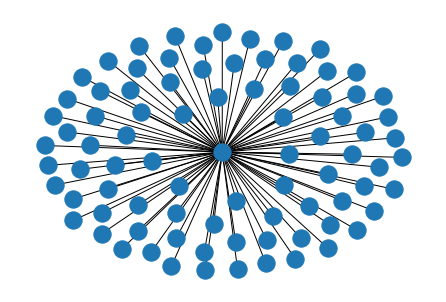

In [3]:
from msticpy.transform.network import df_to_networkx
import networkx as nx

nxg = df_to_networkx(
    df,
    source_col="ResourceGroup",
    target_col="AllExtIPs",
    source_attrs=["TenantId", "VMName"],
    edge_attrs=["FlowType", "TotalAllowedFlows"]
)

nx.draw(nxg)

In [8]:
len({e[1] for e in nxg.edges()})

84

In [11]:
print(len(nxg.nodes))
nxg.nodes[next(iter(nxg.nodes()))]

85


{'TenantId': '52b1ab41-869e-4138-9e40-2a4457f09bf0',
 'VMName': 'msticalertswin1',
 'node_role': 'source',
 'node_type': 'ResourceGroup'}

In [21]:
nxg.edges[('10.0.3.4', '10.0.3.4')]

{}

In [12]:
len(nxg.edges())

84

In [48]:
df.mp_plot.network(
    source_col="ResourceGroup",
    target_col="AllExtIPs",
    source_attrs=["TenantId", "VMName"],
    target_attrs=["TenantId", "VMName"],
    edge_attrs=["FlowType", "TotalAllowedFlows"]
)

Loading BokehJS ...

Figure(id='6059', ...)

In [26]:
procs.assign(
    child=procs.NewProcessName.str.extract(r"(?<=\\)([^\\]+)$"),
    parent=procs.ParentProcessName.str.extract(r"(?<=\\)([^\\]+)$")
)

,Unnamed: 0,TenantId,Account,EventID,TimeGenerated,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,...,ParentProcessName,TargetLogonId,SourceComputerId,TimeCreatedUtc,NodeRole,Level,ProcessId1,NewProcessId1,child,parent
0,0,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:15.677,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:15.677,source,0,NaN,NaN,ftp.exe,cmd.exe
1,1,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:16.167,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:16.167,sibling,1,NaN,NaN,reg.exe,cmd.exe
2,2,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:16.277,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:16.277,sibling,1,NaN,NaN,cmd.exe,cmd.exe
3,3,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:16.340,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:16.340,sibling,1,NaN,NaN,rundll32.exe,cmd.exe
4,4,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:16.400,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:16.400,sibling,1,NaN,NaN,rundll32.exe,cmd.exe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:14.613,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:14.613,sibling,1,NaN,NaN,rundll32.exe,cmd.exe
113,113,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:14.693,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:14.693,sibling,1,NaN,NaN,regsvr32.exe,cmd.exe
114,114,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:14.770,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:14.770,sibling,1,NaN,NaN,tasklist.exe,cmd.exe
115,115,802d39e1-9d70-404d-832c-2de5e2478eda,WORKGROUP\MSTICAlertsWin1$,4688,2019-01-15 05:15:03.047,MSTICAlertsWin1,S-1-5-18,MSTICAlertsWin1$,WORKGROUP,0x3e7,...,C:\Windows\System32\svchost.exe,0xfaac27,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:03.047,parent,1,NaN,NaN,cmd.exe,svchost.exe


In [38]:
procs_df[procs_df.CommandLine.isna()]

,TenantId,Account,EventID,TimeGenerated,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,NewProcessId,...,ParentProcessName,TargetLogonId,SourceComputerId,TimeCreatedUtc,NodeRole,Level,ProcessId1,NewProcessId1,child,parent


In [6]:
import pandas as pd
import msticpy

procs_df = pd.read_csv("docs/notebooks/data/process_tree.csv", index_col=0)
procs_df = procs_df.assign(
    child=procs_df.NewProcessName.str.extract(r"(?<=\\)([^\\]+)$"),
    parent=procs_df.ParentProcessName.str.extract(r"(?<=\\)([^\\]+)$")
).fillna("")


procs_df.mp_plot.network(
    source_col="parent",
    target_col="child",
    source_attrs=["Account"],
    target_attrs=["Account", "CommandLine", "SubjectLogonId"],
    edge_attrs=["TimeGenerated"],
    font_size=8,
    title="Process graph"
)

Loading BokehJS ...

Figure(id='2656', ...)

In [4]:
from msticpy.vis.network_plot import plot_nx_graph

In [5]:
plot_nx_graph(nxg, source_attrs=["TenantId", "VMName"],
    edge_attrs=["FlowType", "TotalAllowedFlows"])

Loading BokehJS ...

Figure(id='1003', ...)

In [5]:
from pyvis import network
pvg = network.Network(notebook=True)
pvg.from_nx(nxg)

from IPython.display import HTML, display, IFrame
# display(IFrame(src=pvg.generate_html(), width="100%", height=600))
pvg.show("test.html")

In [6]:
net_html = """
<html>
<head>
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.16.1/vis.css" type="text/css" />
<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.16.1/vis-network.min.js"> </script>
<center>
<h1></h1>
</center>

<!-- <link rel="stylesheet" href="../node_modules/vis/dist/vis.min.css" type="text/css" />
<script type="text/javascript" src="../node_modules/vis/dist/vis.js"> </script>-->

<style type="text/css">

        #mynetwork {
            width: 500px;
            height: 500px;
            background-color: #ffffff;
            border: 1px solid lightgray;
            position: relative;
            float: left;
        }

        

        

        
</style>

</head>

<body>
<div id = "mynetwork"></div>


<script type="text/javascript">

    // initialize global variables.
    var edges;
    var nodes;
    var network; 
    var container;
    var options, data;

    
    // This method is responsible for drawing the graph, returns the drawn network
    function drawGraph() {
        var container = document.getElementById('mynetwork');
        
        

        // parsing and collecting nodes and edges from the python
        nodes = new vis.DataSet([{"TenantId": "52b1ab41-869e-4138-9e40-2a4457f09bf0", "VMName": NaN, "id": "10.0.3.4", "label": "10.0.3.4", "node_color": "lightgreen", "node_role": "target", "node_type": "AllExtIPs", "shape": "dot", "size": 10}, {"TenantId": "52b1ab41-869e-4138-9e40-2a4457f09bf0", "VMName": NaN, "id": "10.0.3.5", "label": "10.0.3.5", "node_color": "lightgreen", "node_role": "target", "node_type": "AllExtIPs", "shape": "dot", "size": 10}, {"id": "104.211.30.1", "label": "104.211.30.1", "node_color": "lightgreen", "node_role": "target", "node_type": "AllExtIPs", "shape": "dot", "size": 10}]);
        edges = new vis.DataSet([{"FlowType": "IntraVNet", "TotalAllowedFlows": 3.0, "from": "10.0.3.4", "label": 1, "to": "10.0.3.4", "weight": 1}, {"FlowType": "IntraVNet", "TotalAllowedFlows": 3.0, "from": "10.0.3.4", "label": 1, "to": "10.0.3.5", "weight": 1}, {"FlowType": "IntraVNet", "TotalAllowedFlows": 12.0, "from": "10.0.3.5", "label": 1, "to": "104.211.30.1", "weight": 1}, {"FlowType": "IntraVNet", "TotalAllowedFlows": 1.0, "from": "10.0.3.5", "label": 1, "to": "10.0.3.5", "weight": 1}]);

        // adding nodes and edges to the graph
        data = {nodes: nodes, edges: edges};

        var options = {
    "configure": {
        "enabled": false
    },
    "edges": {
        "color": {
            "inherit": true
        },
        "smooth": {
            "enabled": false,
            "type": "continuous"
        }
    },
    "interaction": {
        "dragNodes": true,
        "hideEdgesOnDrag": false,
        "hideNodesOnDrag": false
    },
    "physics": {
        "enabled": true,
        "stabilization": {
            "enabled": true,
            "fit": true,
            "iterations": 1000,
            "onlyDynamicEdges": false,
            "updateInterval": 50
        }
    }
};
        
        

        

        network = new vis.Network(container, data, options);
	 
        


        

        return network;

    }

    drawGraph();

</script>
</body>
</html>
"""

In [7]:
display(IFrame(src="./test.html", width="50%", height=600))

In [1]:
from msticpy.auth.azure_auth import az_connect
az_connect()

AzCredentials(legacy=<msticpy.auth.cred_wrapper.CredentialWrapper object at 0x000002101089BF10>, modern=<azure.identity._credentials.default.DefaultAzureCredential object at 0x000002101089B5B0>)

In [25]:
from msticpy.context.azure import azure_data
from msticpy.context.azure import MicrosoftSentinel

# creds = az_connect()
sub_cli = azure_data.SubscriptionClient(credential=creds)
for sub in sub_cli.subscriptions.list():
    print(dir(sub))
    break

In [38]:
az = azure_data.AzureData(connect=True)

az.list_sentinel_workspaces(sub_id=sub.id.split("/")[-1])

Finding Microsoft Sentinel Workspaces...


{'scuba-graphstorerunner-devws': '/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e/resourcegroups/graphstorerunner-dev-cus-rg/providers/Microsoft.OperationalInsights/workspaces/scuba-graphstorerunner-devws',
 'scuba-graphstorerunner-unitedstates': '/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e/resourcegroups/graphstorerunner-dev-rg/providers/Microsoft.OperationalInsights/workspaces/scuba-graphstorerunner-unitedstates',
 'scubakeyvaultdiaglogsdev': '/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e/resourcegroups/scubadiagnosticslogsworkspace/providers/Microsoft.OperationalInsights/workspaces/scubakeyvaultdiaglogsdev',
 'wsu-sentinel-demo-ws': '/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e/resourcegroups/wsu-sentinel-demo-rg/providers/Microsoft.OperationalInsights/workspaces/wsu-sentinel-demo-ws',
 'scuba-graphstorerunner-canary': '/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e/resourcegroups/graphstorerunner-prod-weu-rg/providers/Microsoft.OperationalInsights/work

In [37]:
def get_workspaces(sub_id):
    res = self.get_resources(sub_id=sub_id)  # type: ignore
    # handle no results
    if isinstance(res, pd.DataFrame) and not res.empty:
        sentinel = res[
            (res["resource_type"] == "Microsoft.OperationsManagement/solutions")
            & (res["name"].str.startswith("SecurityInsights"))
        ]
        workspaces = []
        for wrkspace in sentinel["resource_id"]:
            res_details = self.get_resource_details(
                sub_id=sub_id, resource_id=wrkspace  # type: ignore
            )
            workspaces.append(res_details["properties"]["workspaceResourceId"])

        workspaces_dict = {}
        for wrkspace in workspaces:
            name = wrkspace.split("/")[-1]
            workspaces_dict[name] = wrkspace
        return workspaces_dict

'a61545b7-abcd-4a28-bff6-85c783b2a02e'

In [32]:
get

'/subscriptions/a61545b7-abcd-4a28-bff6-85c783b2a02e'

In [9]:
import msticpy
msticpy.MpConfigEdit("tests/msticpyconfig-test.yaml")

Label(value='Loading. Please wait.')

In [1]:
import pandas as pd


pd.read_html("https://ms.portal.azure.com/#@microsoft.onmicrosoft.com/resource/subscriptions/d1d8779d-38d7-4f06-91db-9cbc8de0176f/resourceGroups/soc/providers/Microsoft.OperationalInsights/workspaces/cybersecuritysoc/Overview")

ValueError: No tables found